In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# The Dataset I chose is Solar Radiation Prediction Dataset.
## Below is a description from the kaggle page
The dataset contains such columns as: "wind direction", "wind speed", "humidity" and temperature. The response parameter that is to be predicted is: "Solar_radiation". It contains measurements for the past 4 months and you have to predict the level of solar radiation.
Just imagine that you've got solar energy batteries and you want to know will it be reasonable to use them in future?


## About this file:
These datasets are meteorological data from the HI-SEAS weather station from four months (September through December 2016) between Mission IV and Mission V.

For each dataset, the fields are:

A row number (1-n) useful in sorting this export's results

The UNIX time_t date (seconds since Jan 1, 1970). Useful in sorting this export's results with other export's results

The date in yyyy-mm-dd format

The local time of day in hh:mm:ss 24-hour format

The numeric data, if any (may be an empty string)

The text data, if any (may be an empty string)

The units of each dataset are:

*   Solar radiation: watts per meter^2
*   Temperature: degrees Fahrenheit
*   Humidity: percent
*   Barometric pressure: Hg
*   Wind direction: degrees
*   Wind speed: miles per hour
*   Sunrise/sunset: Hawaii time

    

    

    

    

    

    


In [3]:
import io
from google.colab import files
import csv
uploaded = files.upload()
df = pd.read_csv(io.StringIO(uploaded['SolarPrediction.csv'].decode('utf-8')))
df.head()

Saving SolarPrediction.csv to SolarPrediction.csv


,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [4]:
data_categorical_df = [["UNIXTime", "Data", "Time", "TimeSunRise", "TimeSunSet"]]
data_numerical_df = df[["Radiation", "Temperature", "Pressure", "Humidity", "WindDirection(Degrees)", "Speed"]]

df.columns

Index(['UNIXTime', 'Data', 'Time', 'Radiation', 'Temperature', 'Pressure',
       'Humidity', 'WindDirection(Degrees)', 'Speed', 'TimeSunRise',
       'TimeSunSet'],
      dtype='object')

In [96]:
data_numerical_df.describe()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869
std,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474
min,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000
50%,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


# Conclusions:
The above table contains significant statistics about our dataset. For example we can find out about the min or max radiation, temperature, pressure or humidity.

# Plots

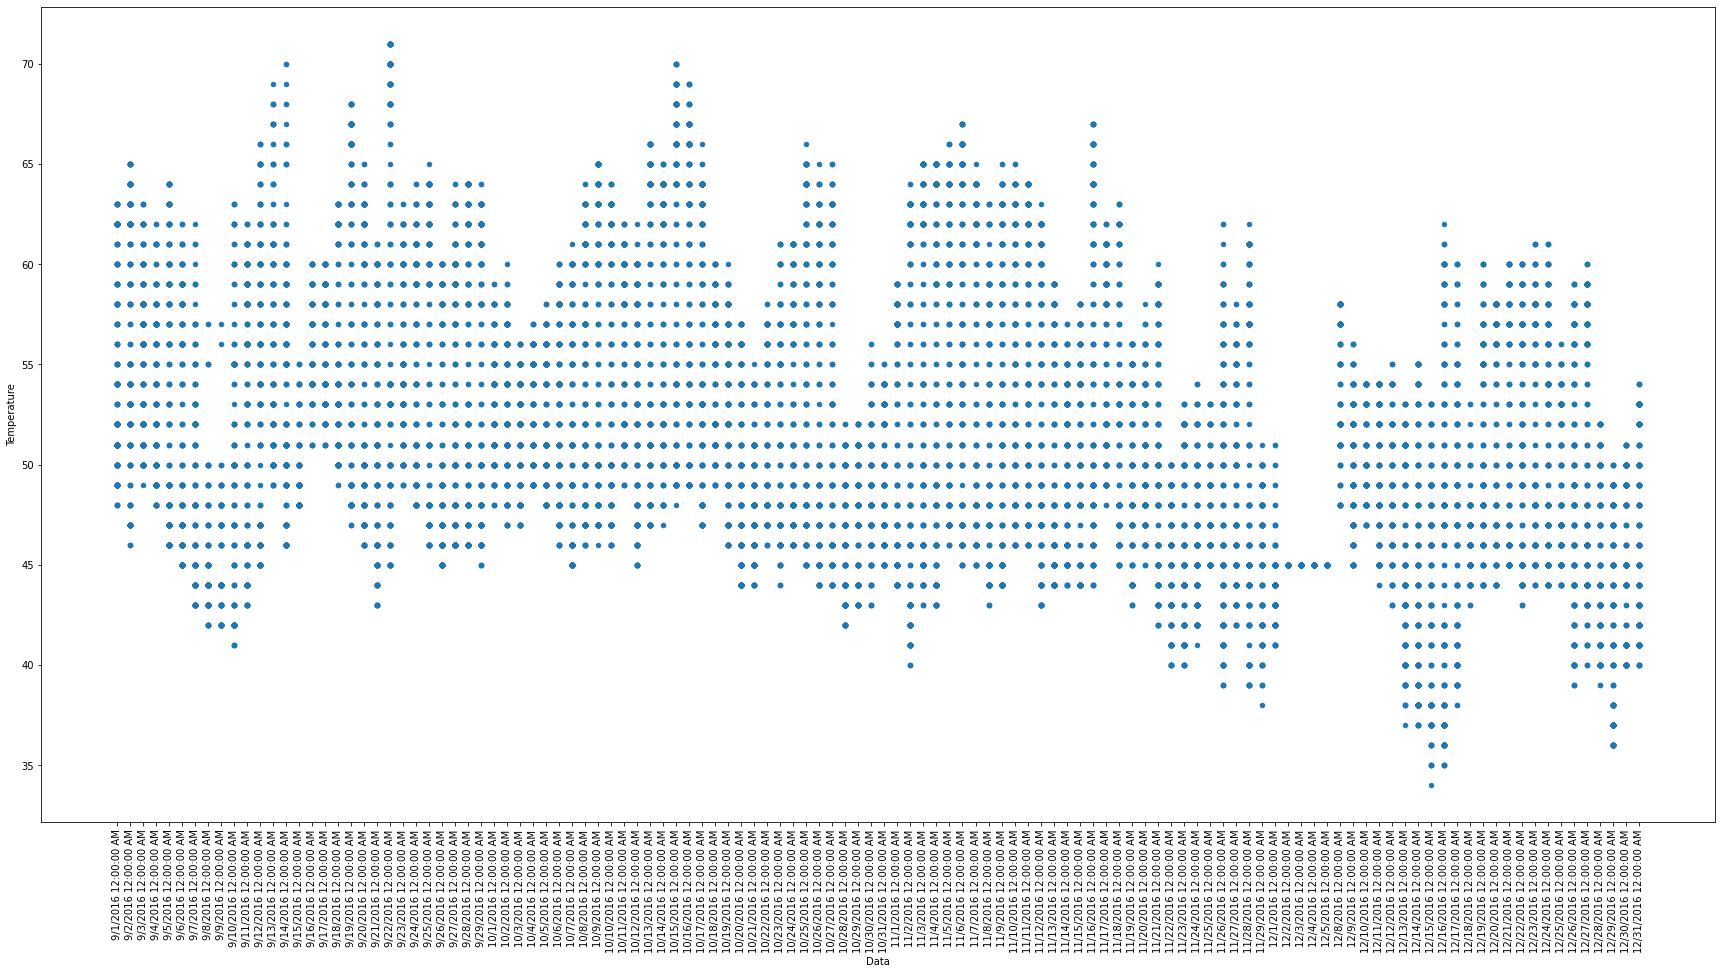

In [6]:
df = df.sort_values('UNIXTime')
data_temperature = df[['Data', 'Temperature']]
data_temperature.plot.scatter(x='Data', y='Temperature', figsize=(30, 15))
plt.xticks(rotation = 90)
plt.show()

Conclusions:
From this graph we can read the daily temperature fluctuations. Compared to September, the maximum temperatures in December are much lower.

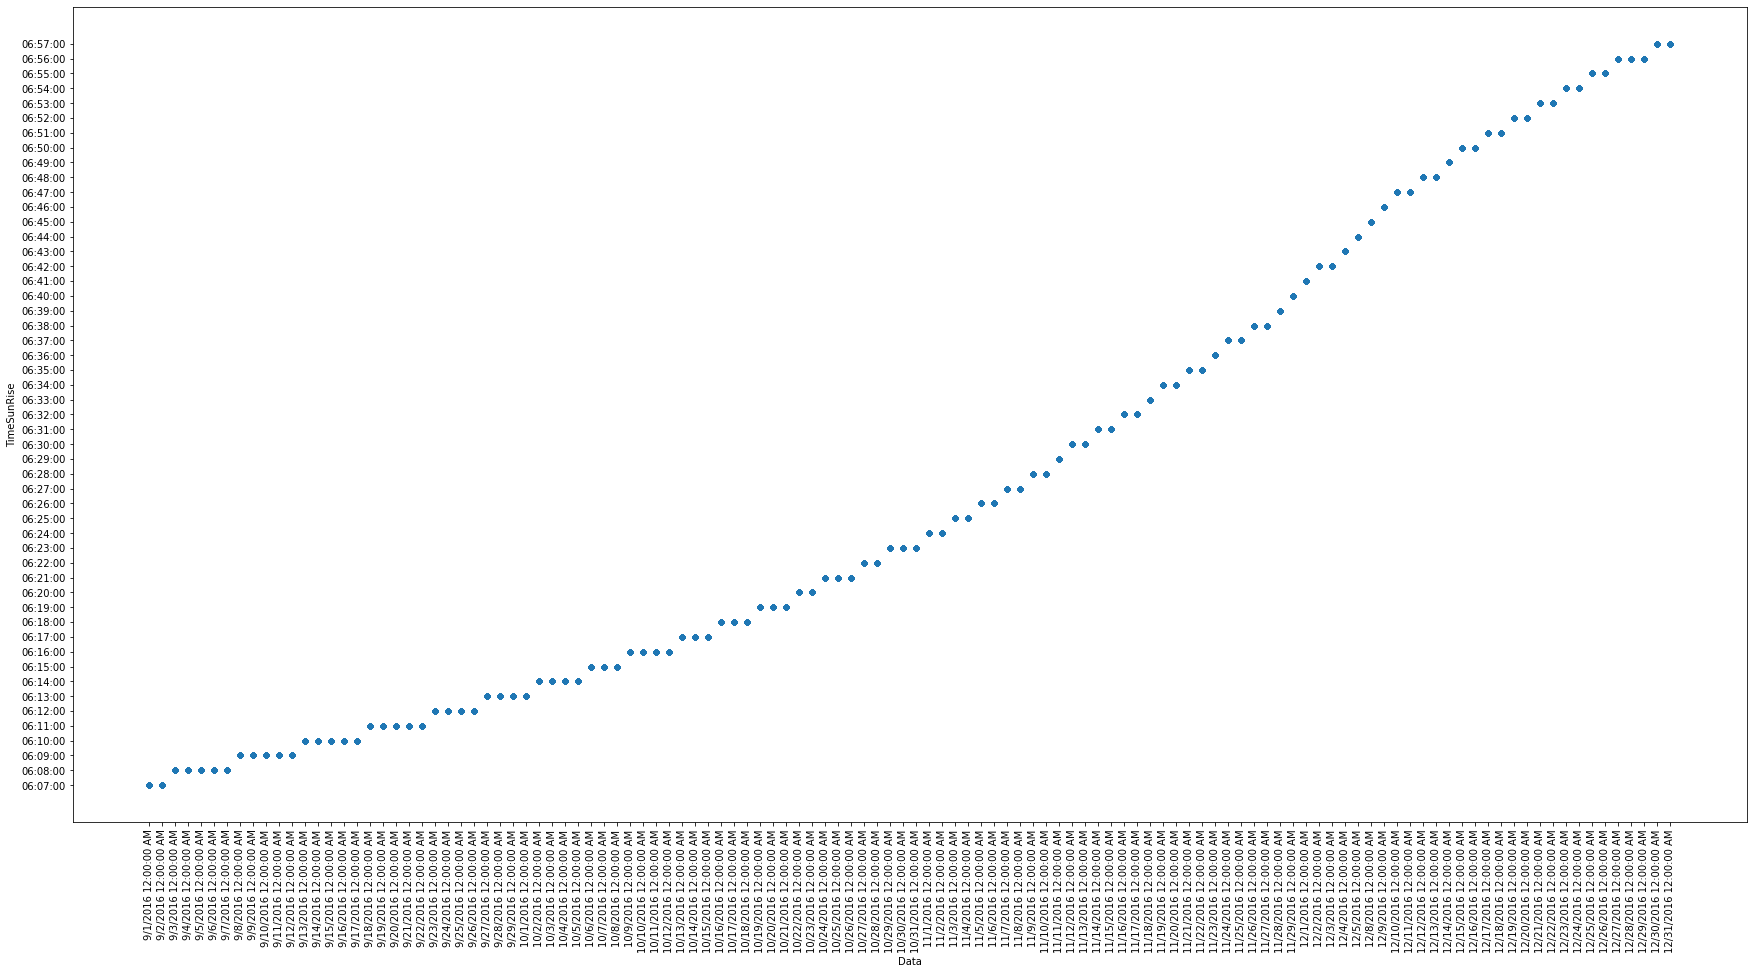

In [7]:
df = df.sort_values('UNIXTime')
data_timesunrise = df[['Data', 'TimeSunRise']]
data_timesunrise.plot.scatter(x='Data', y='TimeSunRise', figsize=(30, 15))
plt.xticks(rotation = 90)
plt.show()

Conclusions: This scatter plot shows the hours when the sunrise was recorded. The sun rises later and later every day.

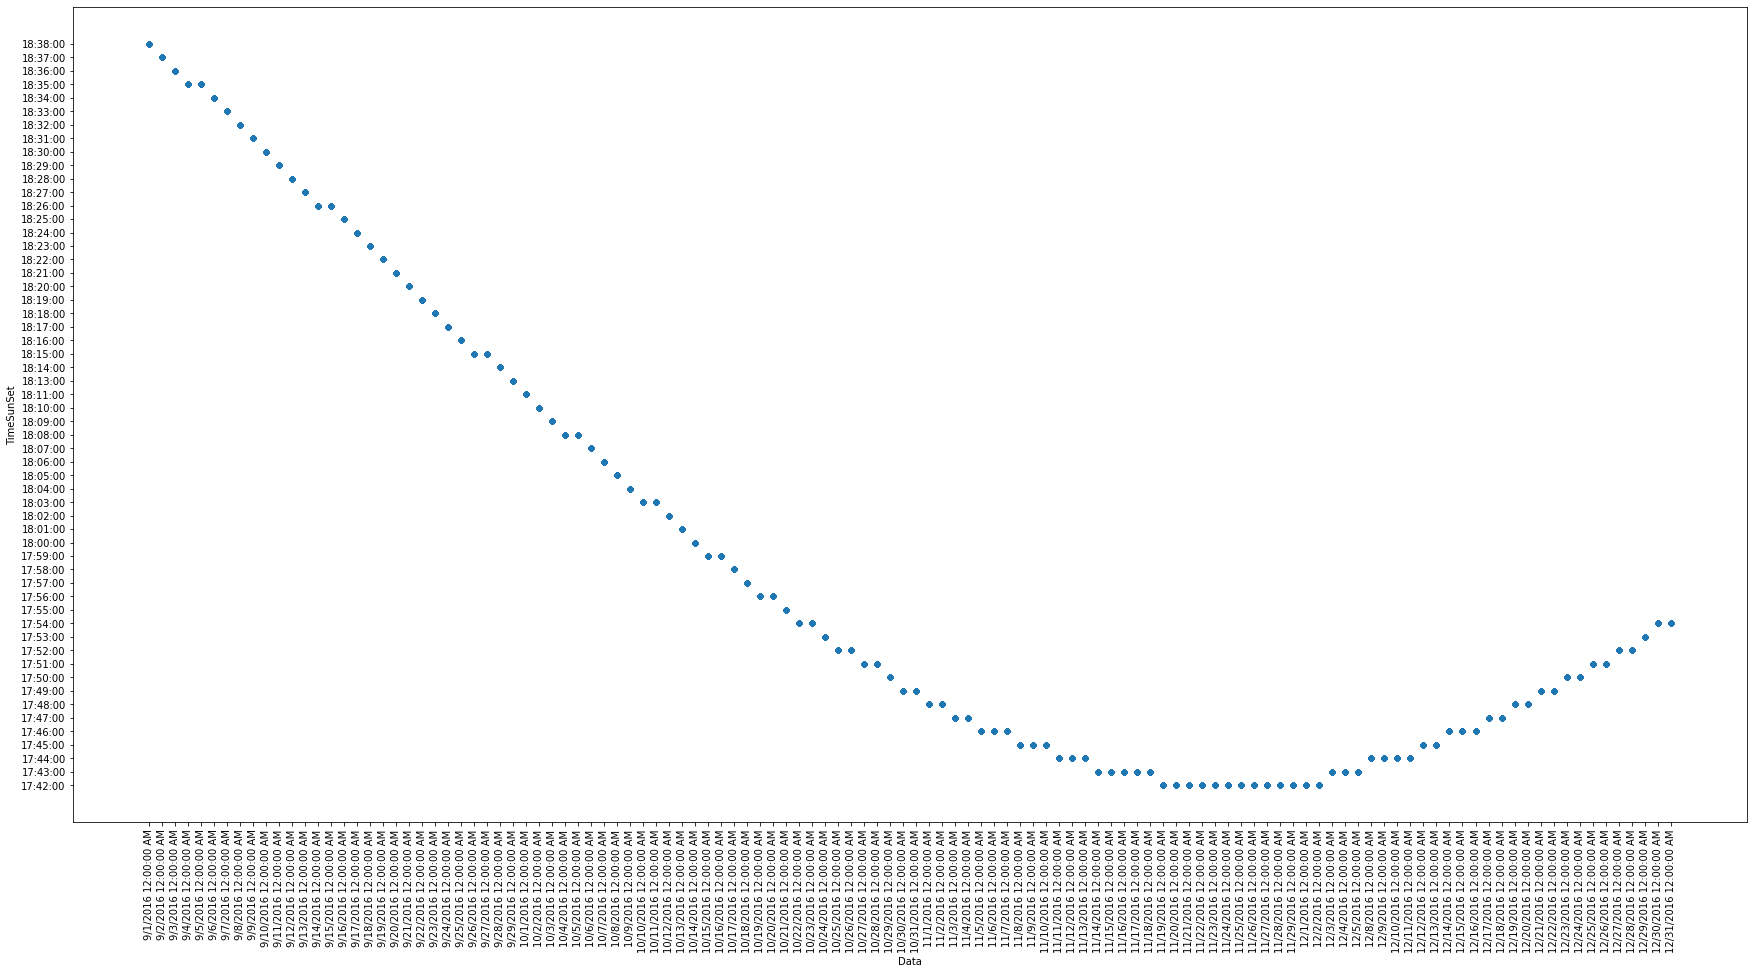

In [8]:
df = df.sort_values('UNIXTime')
data_timesunset = df[['Data', 'TimeSunSet']]
data_timesunset.plot.scatter(x='Data', y='TimeSunSet', figsize=(30, 15))
plt.xticks(rotation = 90)
plt.gca().invert_yaxis()
plt.show()

Conclusions: This scatter plot shows the hours when the sunset was recorded. The sun goes down earlier and earlier until the end of November.

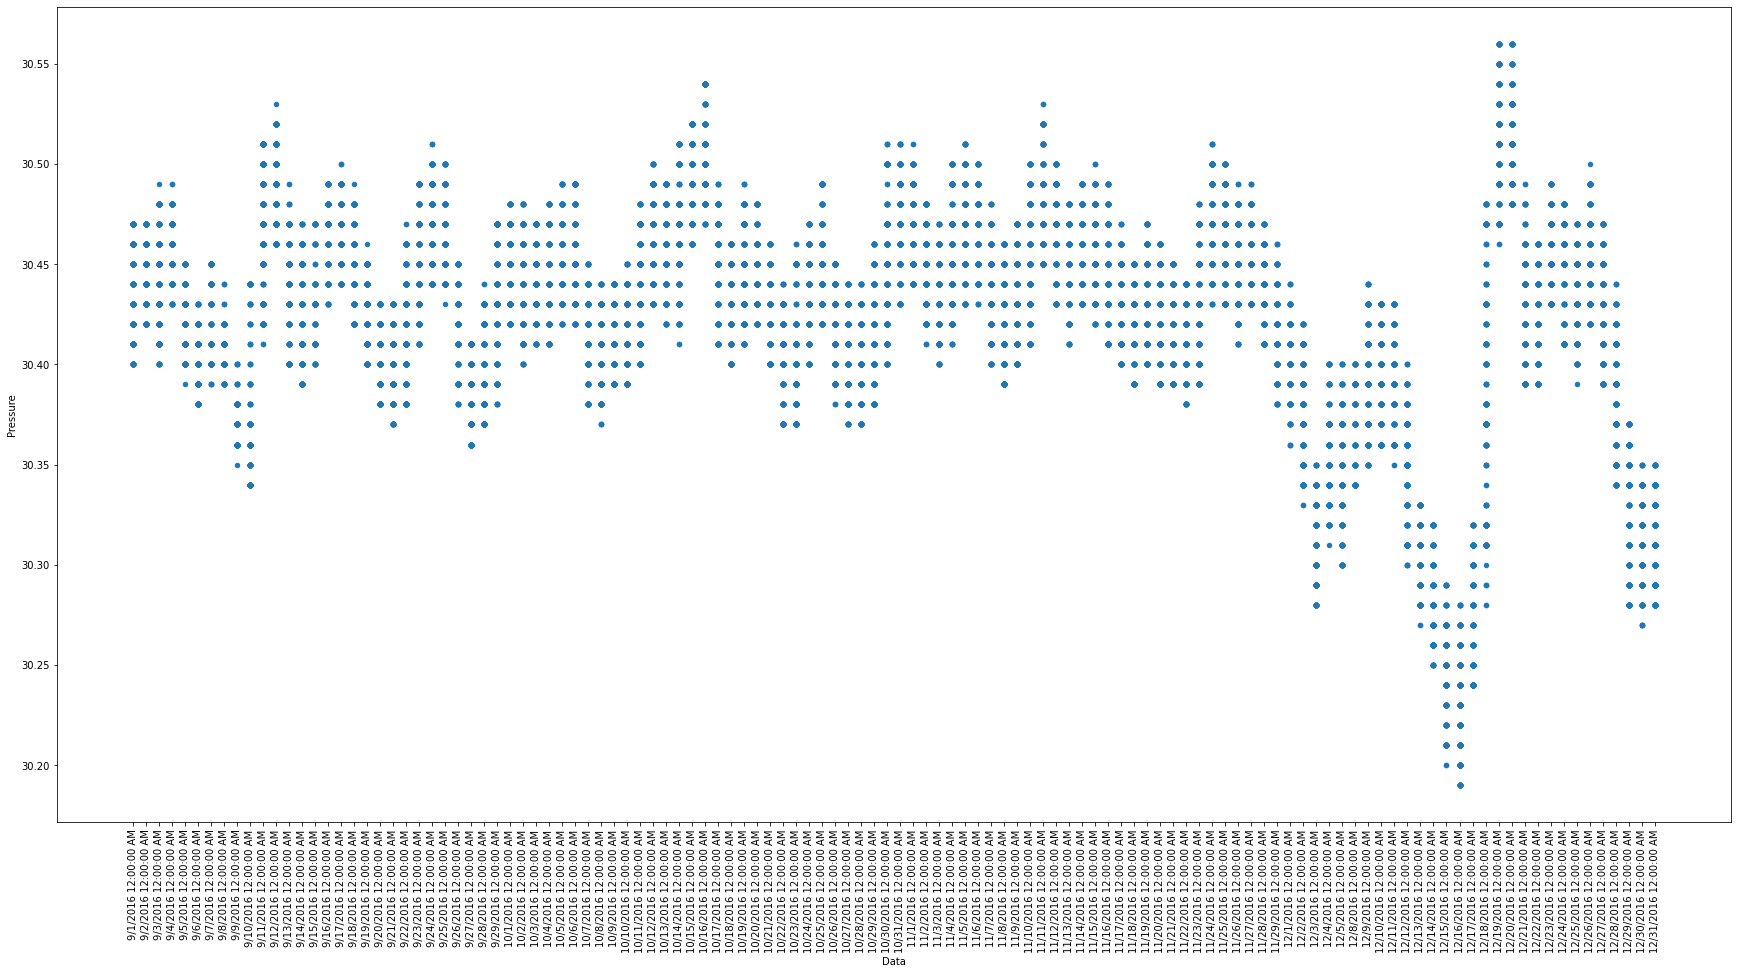

In [9]:
df = df.sort_values('UNIXTime')
data_pressure = df[['Data', 'Pressure']]
data_pressure.plot.scatter(x='Data', y='Pressure', figsize=(30, 15))
plt.xticks(rotation = 90)
plt.show()

Conclusions: This scatter plot shows daily pressure fluctuations. The highest fluctuations are 18.12.2016 and the lowest pressure was also recorded in December.

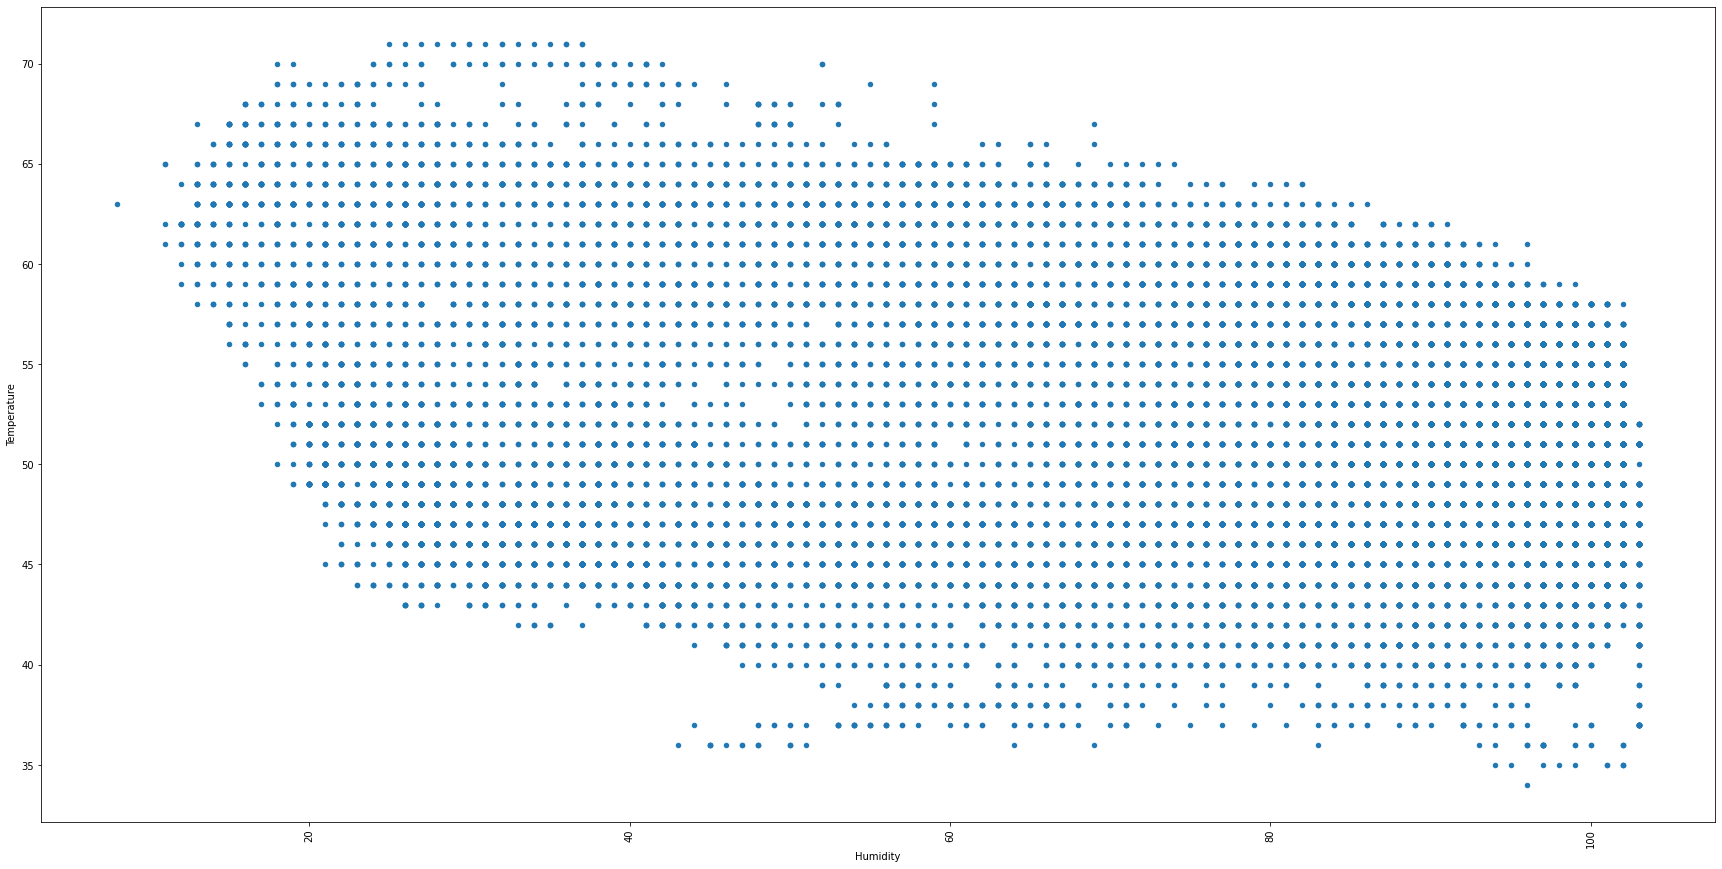

In [12]:
df = df.sort_values('UNIXTime')
humidity_temperature = df[['Humidity', 'Temperature']]
humidity_temperature.plot.scatter(x='Humidity', y='Temperature', figsize=(30, 15))
plt.xticks(rotation = 90)
plt.show()

Conclusions: This scatter plot shows the relationship between humidity and temperature. At high temperatures, the humidity is much lower and for lower temperatures the humidity is higher.

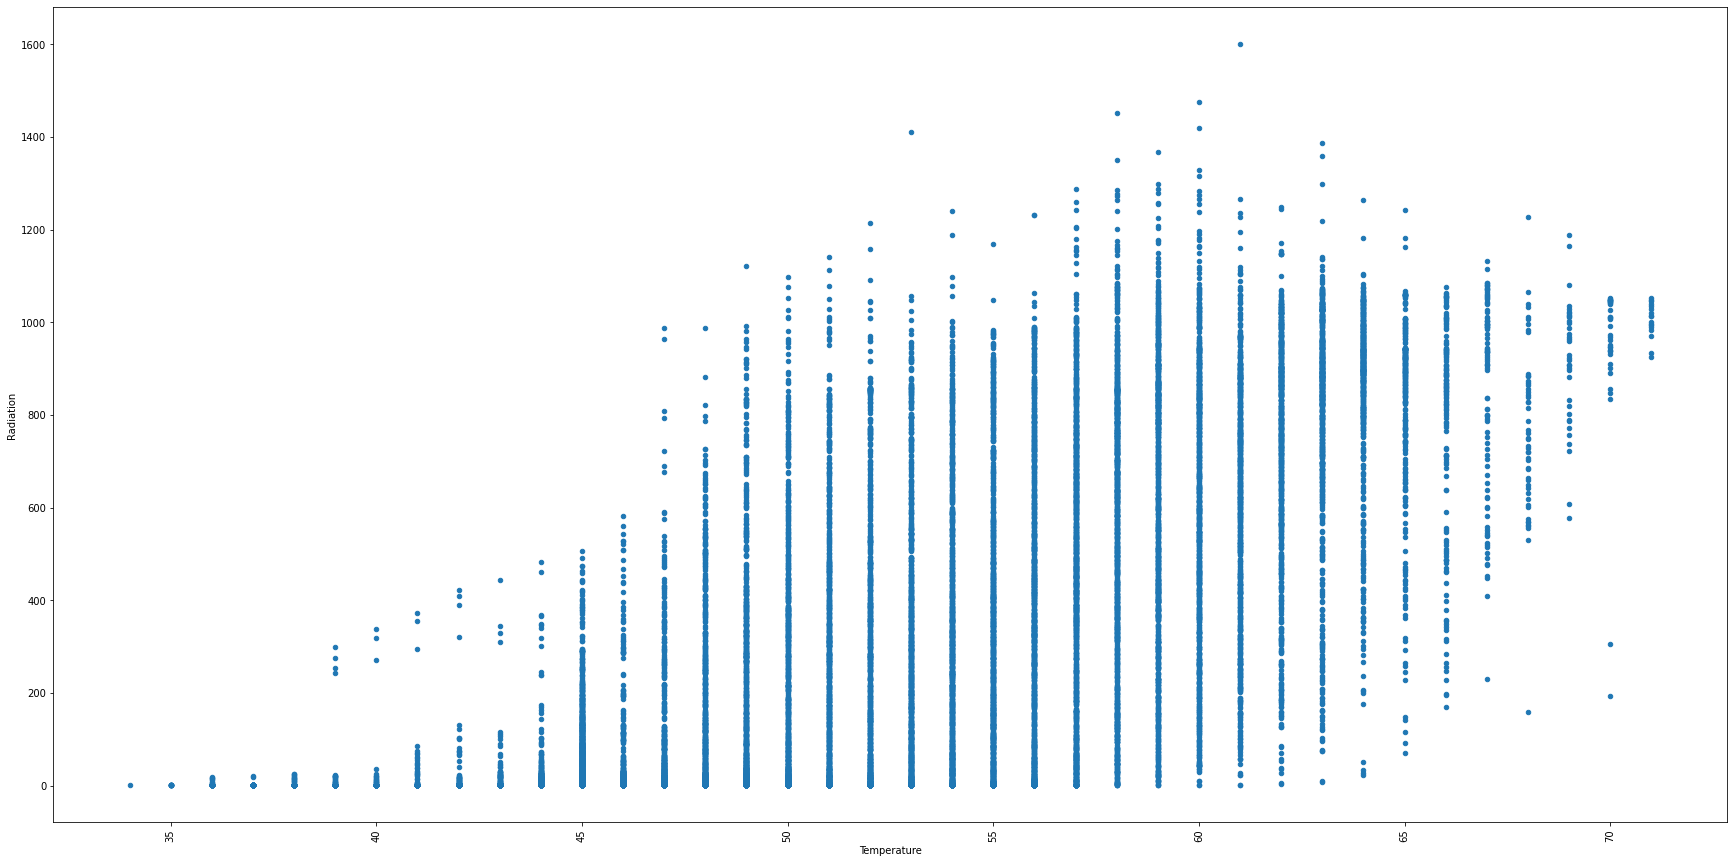

In [17]:
df = df.sort_values('UNIXTime')
temperature_radiation = df[['Temperature', 'Radiation']]
temperature_radiation.plot.scatter(x='Temperature', y='Radiation', figsize=(30, 15))
plt.xticks(rotation = 90)
plt.show()

Conclusions: This scatter plot shows the relationship between radiation and temperature. We can infer that radiation increases with temperature.

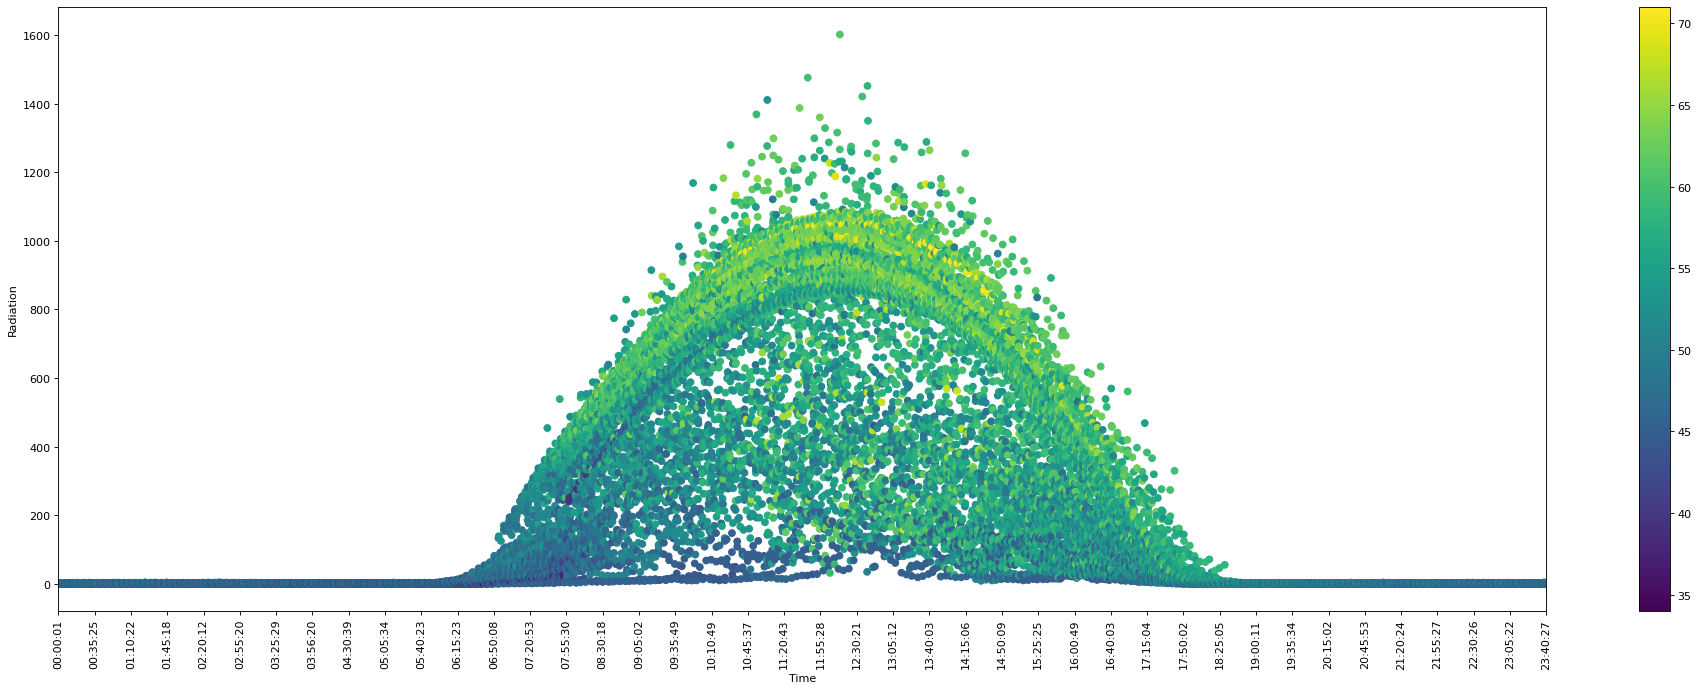

In [97]:
df = df.sort_values('Time')

plt.figure(figsize=(30, 10), dpi=80)
plt.scatter(df.Time, df.Radiation, c=df.Temperature)
plt.xticks(np.arange(0, len(df.Time) + 1, 200), rotation = 90)
plt.xlim("00:00:01", "23:40:27")
plt.xlabel("Time")
plt.ylabel("Radiation")
plt.colorbar()

Conclusions: The above scatter plot shows the relationship between the radiation in given hours and the prevailing temperature then. In the morning and at night, when the temperature is low, radiation is negligible. Radiation increases drastically during the day, when the temperatures are higher.

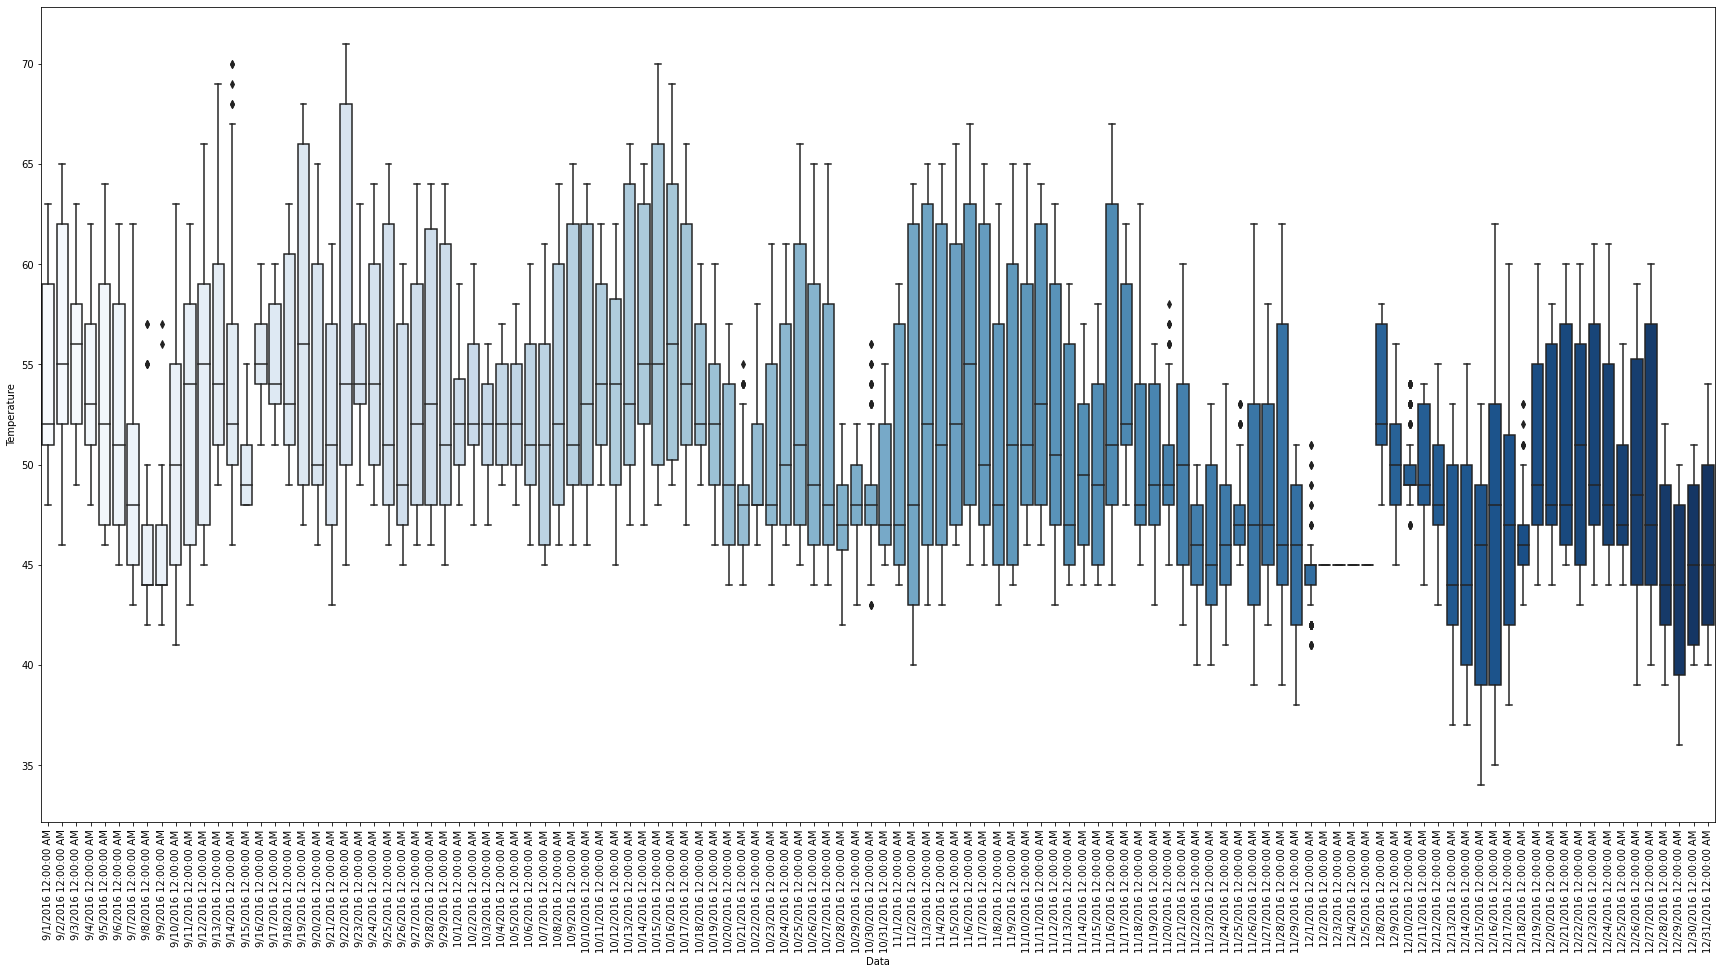

In [69]:
import seaborn as sns
plt.figure(figsize=(30,15))
plt.xticks(rotation = 90)
sns.boxplot(x=df.Data, y=df.Temperature, palette="Blues")


Conclusions: This graph shows the same data as the earlier scatter plot with temperature and date, but the boxplot allows us to see information about the distribution of these data such as the median or their dispersion and we can see outliners.

In [98]:
september = df.loc[(df["UNIXTime"] > 1472720792) & (df["UNIXTime"] < 1475226392) & (df["Temperature"] > 64)]
september.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,2.230000e+02,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,1.474244e+09,864.227982,67.412556,30.439103,38.394619,120.730717,8.210628
std,4.224361e+05,239.326523,1.907837,0.028618,14.737840,102.444772,4.021583
min,1.472854e+09,148.340000,65.000000,30.400000,15.000000,0.110000,1.120000
25%,1.473895e+09,775.575000,66.000000,30.420000,25.000000,31.050000,5.060000
50%,1.474325e+09,954.320000,67.000000,30.440000,37.000000,114.520000,7.870000
75%,1.474581e+09,1042.150000,69.000000,30.450000,50.000000,157.090000,10.120000
max,1.474840e+09,1242.360000,71.000000,30.530000,74.000000,359.920000,20.250000


I select data from September, in which the temperature was higher than 64.

In [99]:
abs(september["Data"].size - len(september['Data'])-len(september['Data'].drop_duplicates()))

8

Conclusions: There were 8 days in September when the temperature was above 64.

Text(0, 0.5, 'Temperature')

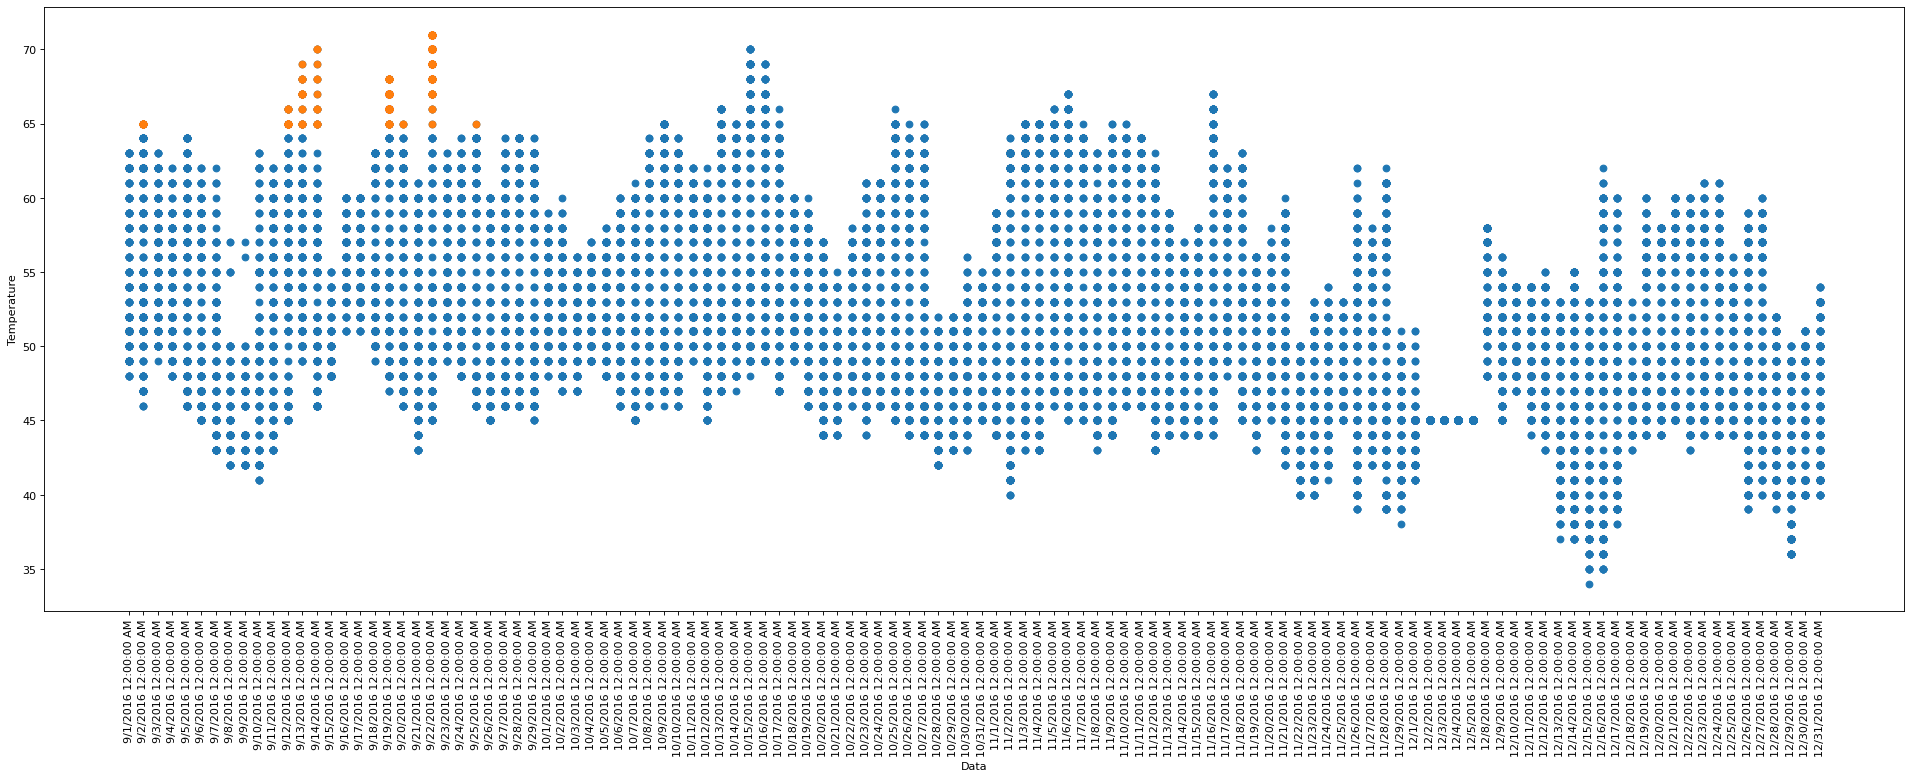

In [90]:
plt.figure(figsize=(30, 10), dpi=80)
plt.scatter(df.Data, df.Temperature)
plt.scatter(september.Data, september.Temperature)
plt.xticks(rotation = 90)
plt.xlabel("Data")
plt.ylabel("Temperature")

Conclusions: The above scatter plot confirms that there were 8 days in September when the temperature was higher than 64.